# Plot Climate Indices from NOAA
* Wenchang Yang
* Department of Earth System Science, University of California, Irvine
* yang.wenchang@uci.edu
* www.ess.uci.edu/~wenchay

In [1]:
from IPython.display import HTML
HTML('<iframe width=900px height=400px src="http://www.esrl.noaa.gov/psd/gcos_wgsp/Timeseries/SOI/"></iframe>')

In [2]:
%matplotlib inline

In [3]:
# %load climate_index.py
# 
# Download and plot climate indices from the NOAA website.
# 
# Written by Wenchang Yang (yang.wenchang@uci.edu)
# 

from __future__ import print_function
import pandas as pd
try:
    import seaborn
except:
    pass

database = {
    'soi': {
        'long_name': 'Southern Oscillation Index',
        'url': 'http://www.esrl.noaa.gov/psd/gcos_wgsp/Timeseries/Data/soi.long.data',
        'invalid_value': -10.0,
    },
    'nao': {
        'long_name': 'North Atlantic Oscillation',
        'url': 'http://www.esrl.noaa.gov/psd/gcos_wgsp/Timeseries/Data/nao.long.data',
        'invalid_value': -99.99,
    },
    'rnao': {
        'long_name': 'Reconstructed monthly NAO index back to December 1658',
        'url': 'http://www.esrl.noaa.gov/psd/gcos_wgsp/Timeseries/Data/rnao.long.data',
        'invalid_value': -99.90,
    },
    'ao':{
        'long_name': 'Arctic Oscillation Index',
        'url': 'http://www.esrl.noaa.gov/psd/gcos_wgsp/Timeseries/Data/ao.long.data',
        'invalid_value': -9.990,
    },
    'ao20r': {
        'long_name': 'Arctic Oscillation Index from the 20thC Reanalysis',
        'url': 'http://www.esrl.noaa.gov/psd/gcos_wgsp/Timeseries/Data/ao20thc.long.data',
        'invalid_value': -999.0,
    },
    'pdo': {
        'long_name': 'Pacific Decadal Oscillation',
        'url': 'http://www.esrl.noaa.gov/psd/gcos_wgsp/Timeseries/Data/pdo.long.data',
        'invalid_value': -9.90,
    },
    'np': {
        'long_name': 'North Pacific Index',
        'url': 'http://www.esrl.noaa.gov/psd/gcos_wgsp/Timeseries/Data/np.long.data',
        'invalid_value': -999.0,
    },
    'tp': {
        'long_name': 'Trans Polar Index',
        'url': 'http://www.esrl.noaa.gov/psd/gcos_wgsp/Timeseries/Data/tpi.long.data',
        'invalid_value': -9.99,
    },
    'ip': {
        'long_name': 'Iceland SLP',
        'url': 'http://www.esrl.noaa.gov/psd/gcos_wgsp/Timeseries/Data/nao_ice.long.data',
        'invalid_value': -10,
    },
    'ap': {
        'long_name': 'Ponta Delgada, Azores SLP',
        'url': 'http://www.esrl.noaa.gov/psd/gcos_wgsp/Timeseries/Data/nao_azo.long.data',
        'invalid_value': -10,
    },
    'gp': {
        'long_name': 'Gibraltar SLP',
        'url': 'http://www.esrl.noaa.gov/psd/gcos_wgsp/Timeseries/Data/nao_gib.long.data',
        'invalid_value': -10,
    },
    'nslp': {
        'long_name': 'Nagasaki SLP',
        'url': 'http://www.esrl.noaa.gov/psd/gcos_wgsp/Timeseries/Data/nagasakipres.long.data',
        'invalid_value': -10,
    },
    'mp': {
        'long_name': 'Madras SLP',
        'url': 'http://www.esrl.noaa.gov/psd/gcos_wgsp/Timeseries/Data/madrasslp.long.data',
        'invalid_value': -10,
    },
    'nino12': {
        'long_name': 'Nino 1+2 SST Index',
        'url': 'http://www.esrl.noaa.gov/psd/gcos_wgsp/Timeseries/Data/nino12.long.anom.data',
        'invalid_value': -99.99,
    },
    'nino3': {
        'long_name': 'Nino 3 SST Index',
        'url': 'http://www.esrl.noaa.gov/psd/gcos_wgsp/Timeseries/Data/nino3.long.anom.data',
        'invalid_value': -99.99,
    },
    'nino34': {
        'long_name': 'Nino 3.4 SST Index',
        'url': 'http://www.esrl.noaa.gov/psd/gcos_wgsp/Timeseries/Data/nino34.long.anom.data',
        'invalid_value': -99.99,
    },
    'nino4': {
        'long_name': 'Nino 4 SST Index',
        'url': 'http://www.esrl.noaa.gov/psd/gcos_wgsp/Timeseries/Data/nino4.long.anom.data',
        'invalid_value': -99.99,
    },
    'amo': {
        'long_name': 'Atlantic multidecadal oscillation SST Index',
        'url': 'http://www.esrl.noaa.gov/psd/gcos_wgsp/Timeseries/Data/amo.long.data',
        'invalid_value': -99.99,
    },
    'amo_sm': {
        'long_name': 'Atlantic multidecadal oscillation SST Index (smoothed)',
        'url': 'http://www.esrl.noaa.gov/psd/gcos_wgsp/Timeseries/Data/amo.sm.long.data',
        'invalid_value': -99.990,
    },
    'amo_detrend': {
        'long_name': 'Atlantic multidecadal oscillation SST Index (detrended)',
        'url': 'http://www.esrl.noaa.gov/psd/data/correlation//amon.us.long.data',
        'invalid_value': -99.99,
    },
    'amo_detrend_sm': {
        'long_name': 'Atlantic multidecadal oscillation SST Index (detrended, smoothed)',
        'url': 'http://www.esrl.noaa.gov/psd/data/correlation/amon.sm.long.data',
        'invalid_value': -99.990,
    },
    'global_t_station': {
        'long_name': 'Global Average Temperature Anomalies (Station Only)',
        'url': 'http://www.esrl.noaa.gov/psd/gcos_wgsp/Timeseries/Data/GLBTS.long.data',
        'invalid_value': -999,
    },
    'global_t_sst': {
        'long_name': 'Global Average Temperature & SST Anomalies (Station + SST)',
        'url': 'http://www.esrl.noaa.gov/psd/gcos_wgsp/Timeseries/Data/GLBTSSST.long.data',
        'invalid_value': -999,
    },
    'global_t_cru': {
        'long_name': 'Global Average Temperature Anomaly (CRU)',
        'url': 'http://www.esrl.noaa.gov/psd/gcos_wgsp/Timeseries/Data/taveglhc4.long.data',
        'invalid_value': -99.99,
    },
    'sunspot': {
        'long_name': 'Sunspot Index',
        'url': 'http://www.esrl.noaa.gov/psd/gcos_wgsp/Timeseries/Data/sunspot.long.data',
        'invalid_value': -99.9,
    },
}
def print_database():
    for name in sorted(database.keys()):
        print(name.upper())
        print(' '*4, database[name]['long_name'])
        print(' '*4, database[name]['url'])
def _get_year_start_end(climate_index_name):
    '''Get the start and end years as a tuple.'''
    url = database[climate_index_name.lower()]['url']
    df = pd.read_csv(url, header=None, nrows=1, sep=r'\s+')
    year_start = df.iloc[0,0]
    year_end = df.iloc[0,1]
    return year_start, year_end
def _get_number_of_years(year_start, year_end):
    return len(range(year_start, year_end)) + 1
def _read_csv(climate_index_name):
    url = database[climate_index_name.lower()]['url']
    year_start, year_end = _get_year_start_end(climate_index_name)
    Nyears = _get_number_of_years(year_start, year_end)
    if year_start < 1678:# ignore records before 1678 since pandas is not able to handle this
        Nskiprecords = 1678 - year_start
    else:
        Nskiprecords = 0
    df = pd.read_csv(url, header=None, skiprows=1+Nskiprecords, 
        nrows=Nyears-Nskiprecords, 
        sep=r'\s+', index_col=0, 
        na_values=database[climate_index_name.lower()]['invalid_value'])
    return df
def _get_year_month_index(year_start, year_end):
    if year_start < 1678: # pandas is not able to handle date before 1678
        year_start = 1678
    Nyears = _get_number_of_years(year_start, year_end)
    year_month_index = pd.date_range(
        str(year_start)+'-01', periods=Nyears*12, freq='M'
    ).to_period()
    return year_month_index
def get_climate_index(climate_index_name=None):
    if climate_index_name is None:
        print_database()
        return
    year_start, year_end = _get_year_start_end(climate_index_name)
    year_month_index = _get_year_month_index(year_start, year_end)
    df = _read_csv(climate_index_name).iloc[:,0:12]
    climate_index = pd.Series(df.values.ravel(), 
        index=year_month_index, name=climate_index_name.upper())
    return climate_index
def plot_climate_index(climate_index_name):
    climate_index = get_climate_index(climate_index_name)
    climate_index.plot()
    plt.legend()

###Important APIs:
* **print_database():** print information of the available climate indices (e.g. long_name, url).
* **get_climate_index(climate_index_name=None):** get the climate index as a pandas Series instance (if None, print the database). 
* **plot_climate_index(climate_index_name):** plot the climate index time series.

### Print the climate index database

In [4]:
print_database()

AMO
     Atlantic multidecadal oscillation SST Index
     http://www.esrl.noaa.gov/psd/gcos_wgsp/Timeseries/Data/amo.long.data
AMO_DETREND
     Atlantic multidecadal oscillation SST Index (detrended)
     http://www.esrl.noaa.gov/psd/data/correlation//amon.us.long.data
AMO_DETREND_SM
     Atlantic multidecadal oscillation SST Index (detrended, smoothed)
     http://www.esrl.noaa.gov/psd/data/correlation/amon.sm.long.data
AMO_SM
     Atlantic multidecadal oscillation SST Index (smoothed)
     http://www.esrl.noaa.gov/psd/gcos_wgsp/Timeseries/Data/amo.sm.long.data
AO
     Arctic Oscillation Index
     http://www.esrl.noaa.gov/psd/gcos_wgsp/Timeseries/Data/ao.long.data
AO20R
     Arctic Oscillation Index from the 20thC Reanalysis
     http://www.esrl.noaa.gov/psd/gcos_wgsp/Timeseries/Data/ao20thc.long.data
AP
     Ponta Delgada, Azores SLP
     http://www.esrl.noaa.gov/psd/gcos_wgsp/Timeseries/Data/nao_azo.long.data
GLOBAL_T_CRU
     Global Average Temperature Anomaly (CRU)
     http://ww

###Show each climate index

Atlantic multidecadal oscillation SST Index
Atlantic multidecadal oscillation SST Index (smoothed)


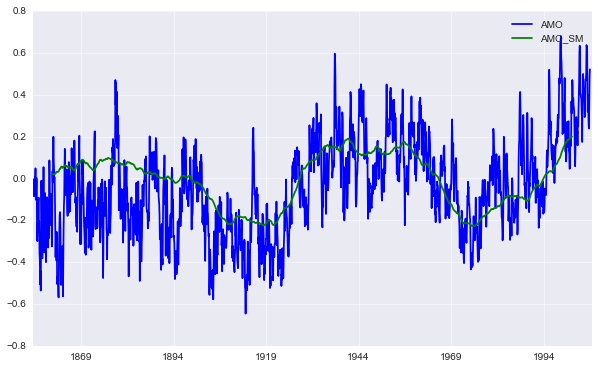

In [5]:
print(database['amo']['long_name'])
print(database['amo_sm']['long_name'])
plot_climate_index('amo')
plot_climate_index('amo_sm')

Atlantic multidecadal oscillation SST Index (detrended)
Atlantic multidecadal oscillation SST Index (detrended, smoothed)


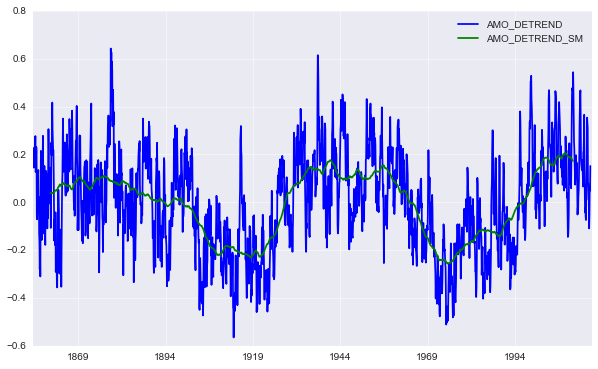

In [6]:
print(database['amo_detrend']['long_name'])
print(database['amo_detrend_sm']['long_name'])
plot_climate_index('amo_detrend')
plot_climate_index('amo_detrend_sm')

Arctic Oscillation Index


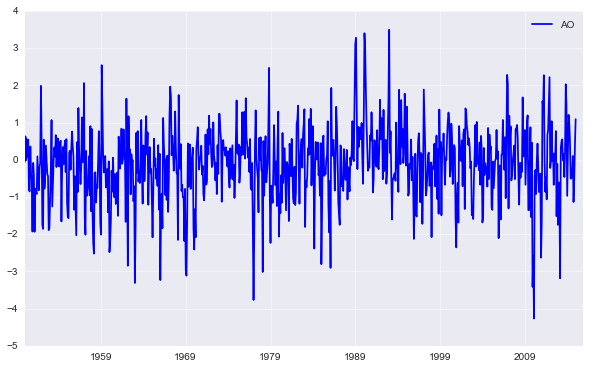

In [7]:
print(database['ao']['long_name'])
plot_climate_index('ao')

Arctic Oscillation Index from the 20thC Reanalysis


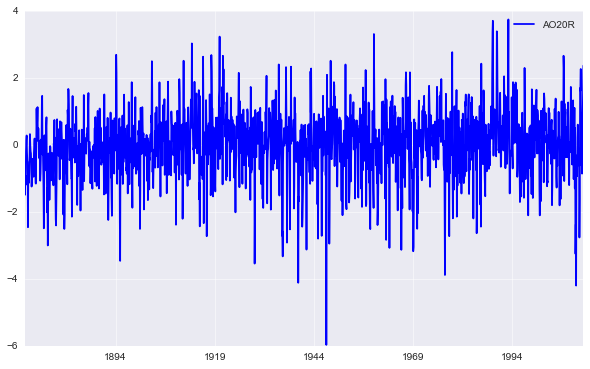

In [8]:
print(database['ao20r']['long_name'])
plot_climate_index('ao20r')

Ponta Delgada, Azores SLP


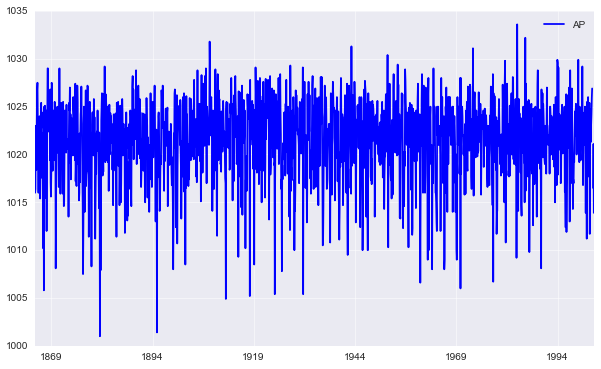

In [9]:
print(database['ap']['long_name'])
plot_climate_index('ap')

Global Average Temperature Anomaly (CRU)


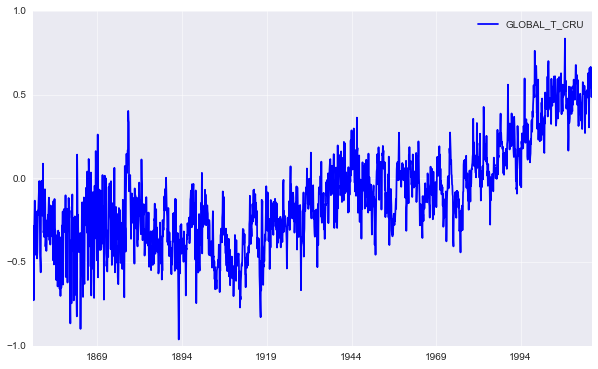

In [10]:
print(database['global_t_cru']['long_name'])
plot_climate_index('global_t_cru')

Global Average Temperature & SST Anomalies (Station + SST)


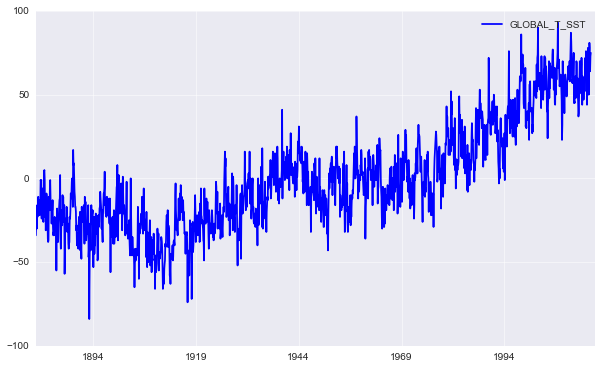

In [11]:
print(database['global_t_sst']['long_name'])
plot_climate_index('global_t_sst')

Global Average Temperature Anomalies (Station Only)


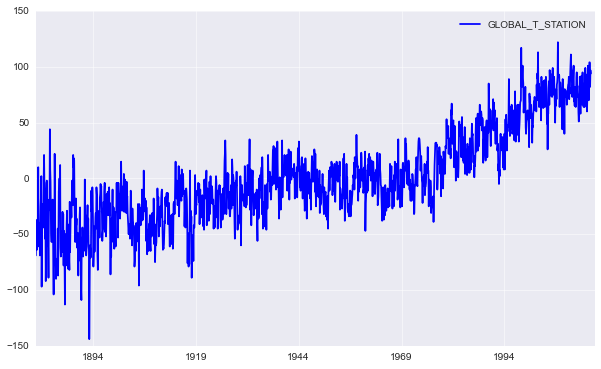

In [12]:
print(database['global_t_station']['long_name'])
plot_climate_index('global_t_station')

Gibraltar SLP


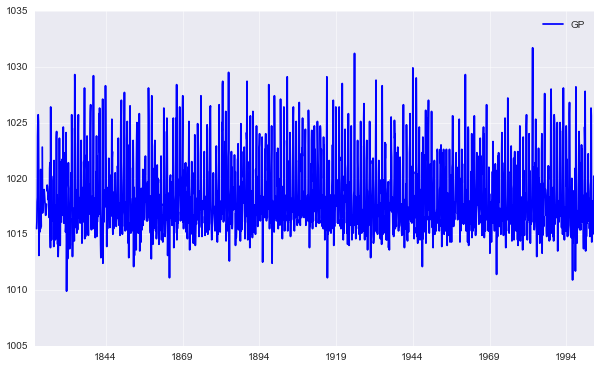

In [13]:
print(database['gp']['long_name'])
plot_climate_index('gp')

Iceland SLP


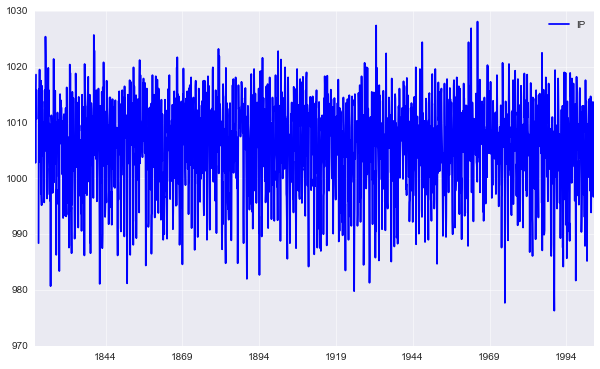

In [14]:
print(database['ip']['long_name'])
plot_climate_index('ip')

Madras SLP


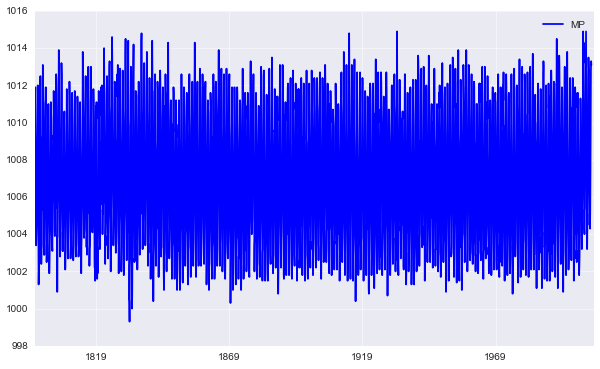

In [15]:
print(database['mp']['long_name'])
plot_climate_index('mp')

North Atlantic Oscillation


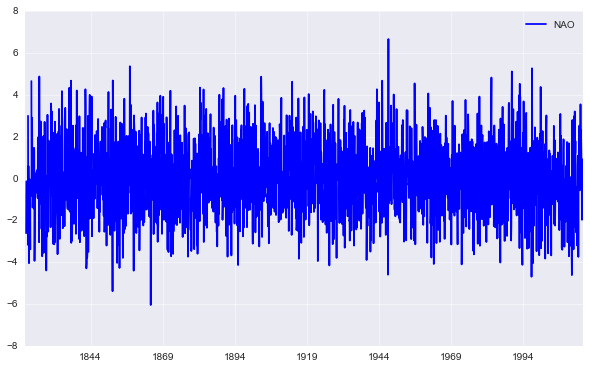

In [16]:
print(database['nao']['long_name'])
plot_climate_index('nao')

Reconstructed monthly NAO index back to December 1658


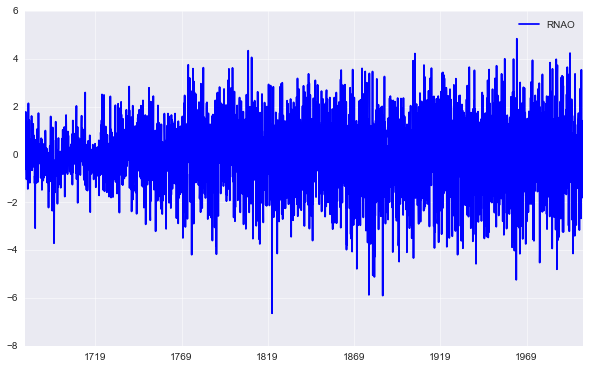

In [17]:
print(database['rnao']['long_name'])
plot_climate_index('rnao')

Nino 1+2 SST Index


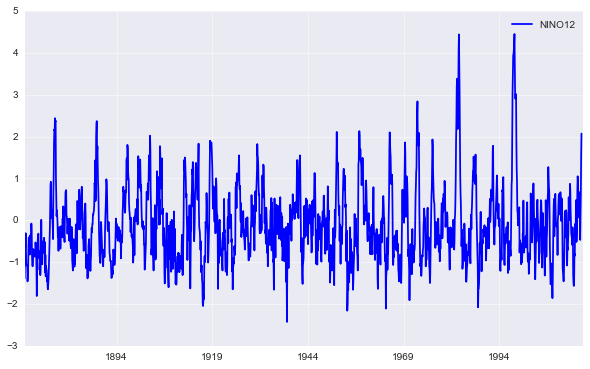

In [18]:
print(database['nino12']['long_name'])
plot_climate_index('nino12')

Nino 3 SST Index


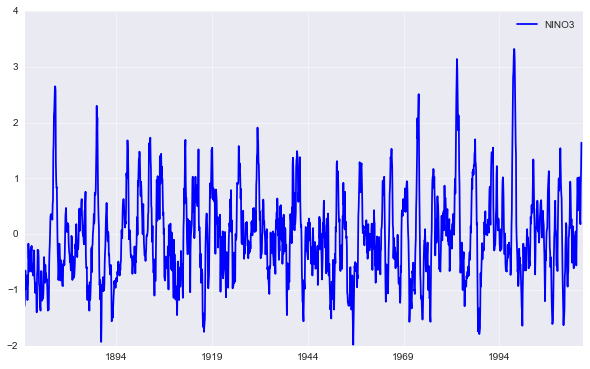

In [19]:
print(database['nino3']['long_name'])
plot_climate_index('nino3')

Nino 3.4 SST Index


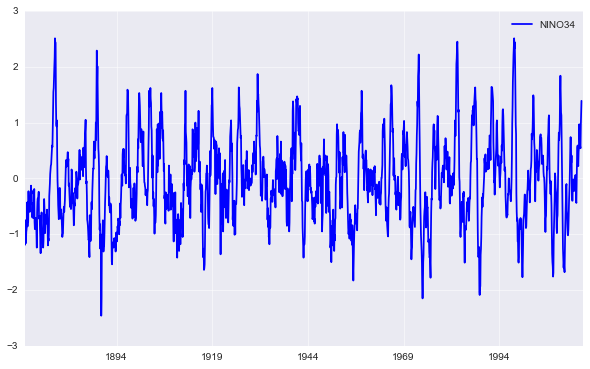

In [20]:
print(database['nino34']['long_name'])
plot_climate_index('nino34')

Nino 4 SST Index


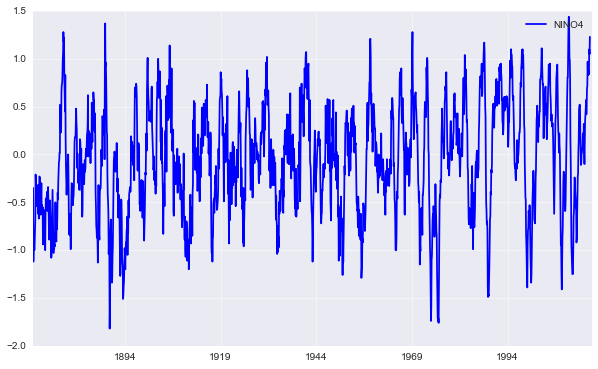

In [21]:
print(database['nino4']['long_name'])
plot_climate_index('nino4')

North Pacific Index


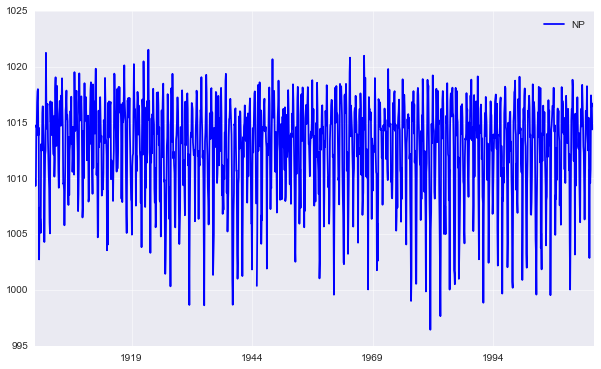

In [22]:
print(database['np']['long_name'])
plot_climate_index('np')

Nagasaki SLP


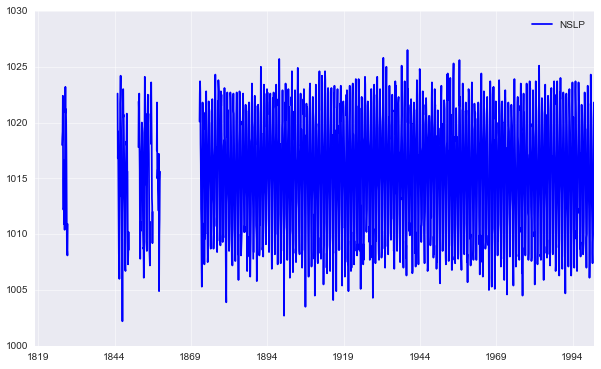

In [23]:
print(database['nslp']['long_name'])
plot_climate_index('nslp')

Pacific Decadal Oscillation


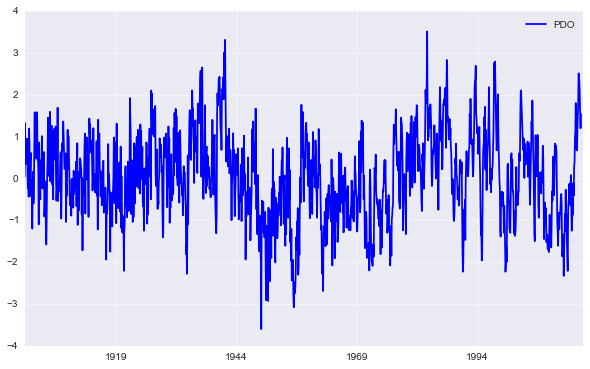

In [24]:
print(database['pdo']['long_name'])
plot_climate_index('pdo')

Southern Oscillation Index


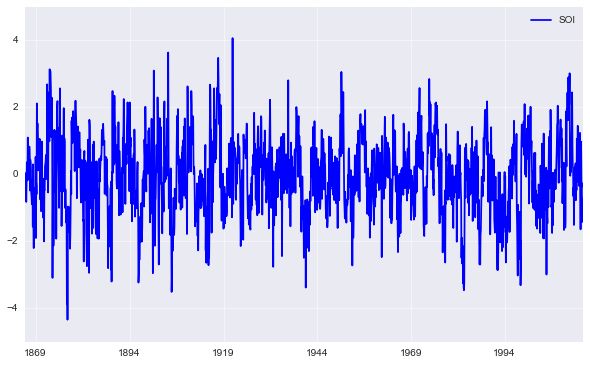

In [25]:
print(database['soi']['long_name'])
plot_climate_index('soi')

Sunspot Index


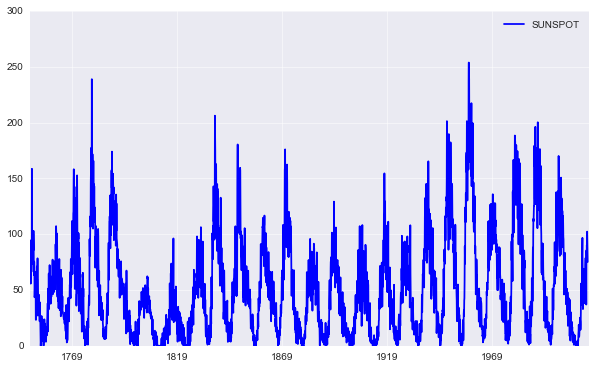

In [26]:
print(database['sunspot']['long_name'])
plot_climate_index('sunspot')

Trans Polar Index


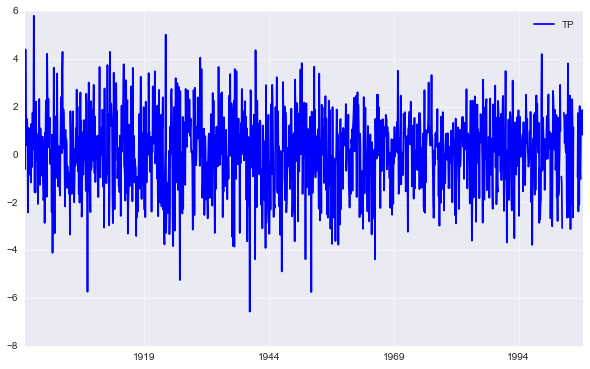

In [27]:
print(database['tp']['long_name'])
plot_climate_index('tp')